# Monty Hall problem
This script was written in order to solve this problem in a very simplified way, adopting different strategies of resolution and allowing to compare the results obtained. Also you can solve this for any number of doors desired.

For more details of the story around the origin of this problem go to the <a href="https://en.wikipedia.org/wiki/Monty_Hall_problem">Monty Hall Problem Wikipedia Page</a>





In [3]:
# MODULES
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def montyHall(Niterations,Ndoors,changeDoor):
    hit = 0
    hitRecord = np.zeros(Niterations)
    for i in range(Niterations): #Number of iteration.
        #STAGE 1: Generate the door according to the desired number.
        doors = list(range(1,Ndoors+1))
        #print('doors: {d}'.format(d=doors))

        #STAGE 2: The car is hidden and the guest chooses a door to open.
        doorCar = np.random.choice(doors) #The host select randomly the  where we'll hide the car.
        #print('doorCar: {d}'.format(d=doorCar))

        #STAGE 3: The guest select randomly a door where he believes the car is hidden.
        guestChoice01 = np.random.choice(doors) 
        #print('guestChoice01: {d}'.format(d=guestChoice01))

        #STAGE 4: The host opens a random door.
        #The opened door cannot be the one selected by the guest nor the one where the car is hidden.
        doors.remove(doorCar)
        if guestChoice01 != doorCar:
            doors.remove(guestChoice01)

        doorOpenedHost = np.random.choice(doors)

        #print('doorOpenedHost: {d}'.format(d=doorOpenedHost)) 
        #print('doors: {d}'.format(d=doors))

        #STAGE 5: The guest chooses, or not (accordingly to strategy adopted), a new door to open.
        if changeDoor == 2:
            changeDoor = np.random.randint(0,2, size = 1) #The guest randomly decides if he's going to open the door or not.

        if changeDoor == 1: #Case where the guest chooses a different door to open rather than the one choosed in first place.
                            #Of course, it also has to be different than the door that the guest has just opened.     
            doors = list(range(1,Ndoors+1))
            doors.remove(guestChoice01)
            doors.remove(doorOpenedHost)
            guestChoice02 = np.random.choice(doors)

            if guestChoice02 == doorCar:
                hit += 1

        if changeDoor == 0:
            if guestChoice01 == doorCar:
                hit += 1        

        hitRecord[i] = hit
        
    return hitRecord

In [9]:
# INPUT PARAMETERS
Niterations = 100 #Number or iterations or realizations.
Ndoors = 3 #Number of doors available.
doors = list(range(1,Ndoors+1))
changeDoor = 1 # 0=No; 1=Yes; 2=Random selection

In [11]:
changingDoor = montyHall(Niterations,Ndoors,1)
keepingDoor = montyHall(Niterations,Ndoors,0)
randomChoice = montyHall(Niterations,Ndoors,2)

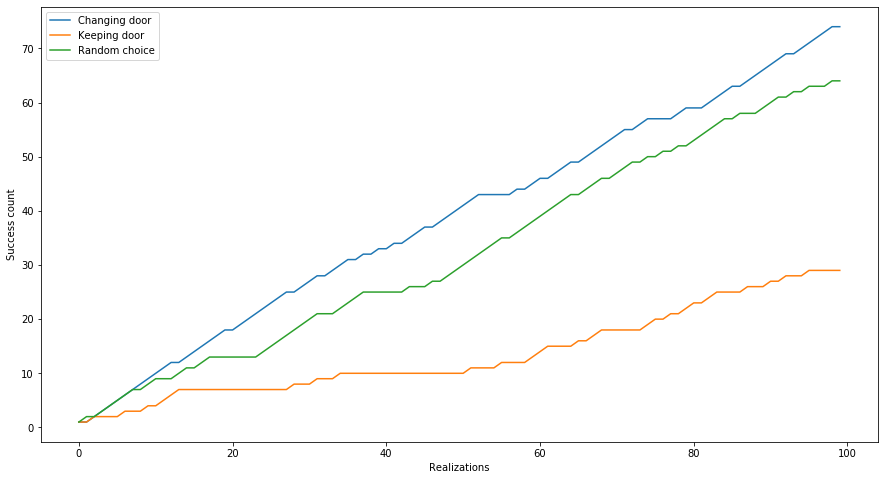

In [24]:
# PLOT THE DATA
f = plt.figure(figsize=(15,8))
plt.plot(changingDoor, label="Changing door")
plt.plot(keepingDoor, label= "Keeping door")
plt.plot(randomChoice, label= "Random choice")
plt.legend()
plt.xlabel('Realizations')
plt.ylabel('Success count')
plt.show()

From the graph we can se that, no matter the number of doors considered, changing doors will always show a higher probability of success than keeping the door selected in first place.